# Time Series Analysis

Get Google Trends data of keywords such as 'diet' and 'gym' and 'finance' see how they vary over time while learning about 
trends and seasonality in time series data.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("multiTimeline.csv",skiprows=1) 

In [3]:
df.head()

,Month,diet: (Worldwide),gym: (Worldwide),finance: (Worldwide)
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 4 columns):
Month                   168 non-null object
diet: (Worldwide)       168 non-null int64
gym: (Worldwide)        168 non-null int64
finance: (Worldwide)    168 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.3+ KB


In [5]:
df.columns = ['month','diet','gym','finance'] #Changing the column name

In [6]:
df.head()

,month,diet,gym,finance
0,2004-01,100,31,48
1,2004-02,75,26,49
2,2004-03,67,24,47
3,2004-04,70,22,48
4,2004-05,72,22,43


In [7]:
df.month = pd.to_datetime(df.month) #turn the 'month' column into a DateTime data type 

In [8]:
df.set_index('month',inplace=True) #you'll make the 'month' column as the index of the DataFrame. 

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 2004-01-01 to 2017-12-01
Data columns (total 3 columns):
diet       168 non-null int64
gym        168 non-null int64
finance    168 non-null int64
dtypes: int64(3)
memory usage: 5.2 KB


In [10]:
df.head()

,diet,gym,finance
month,,,
2004-01-01,100,31,48
2004-02-01,75,26,49
2004-03-01,67,24,47
2004-04-01,70,22,48
2004-05-01,72,22,43


# Exploratory Data Analysis

You can use a built-in pandas visualization method .plot() to plot your data as 3 line plots on a 
single figure (one for each column, namely, 'diet', 'gym', and 'finance').
Note that you can also specify some arguments to this method, such as figsize, linewidthand fontsize 
to set the figure size, line width and font size of the plot, respectively.

Text(0.5, 0, 'Year')

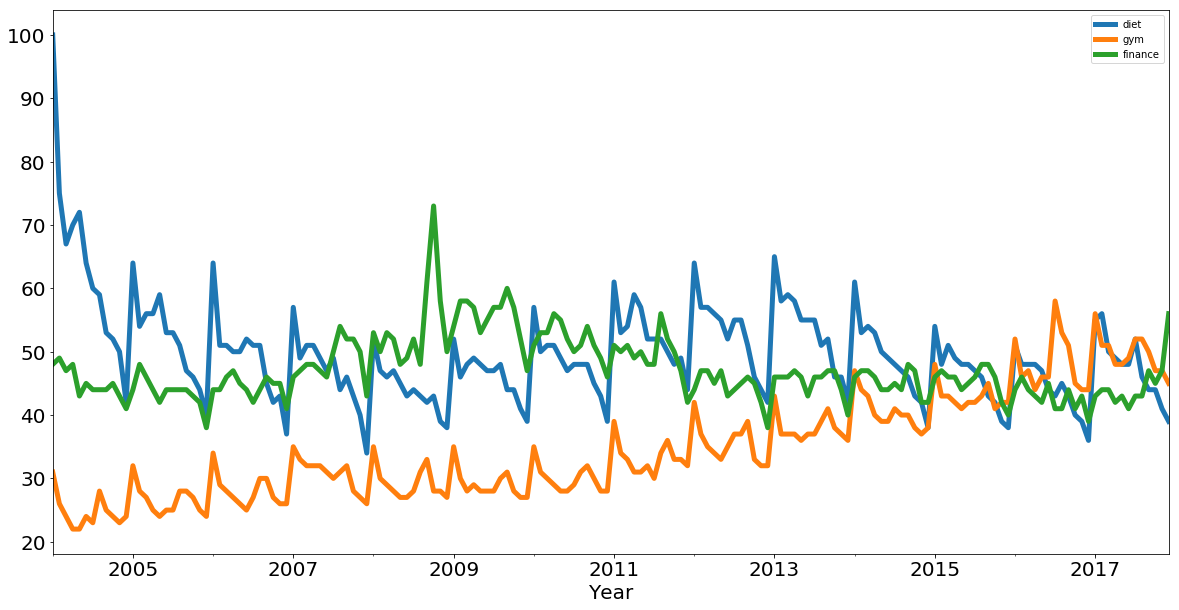

In [11]:
df.plot(figsize=(20,10),linewidth=5,fontsize=20)
plt.xlabel("Year",fontsize=20)

# Identifying Trends in Time Series

Trend: The increasing or decreasing value in the series

There are several ways to think about identifying trends in time series. 
One popular way is by taking a rolling average, which means that, for each time point, 
you take the average of the points on either side of it. Note that the number of points is specified by a window size, 
which you need to choose.
When it comes to determining the window size, here, it makes sense to first try out one of twelve months,
as you're talking about yearly seasonality.

# Trends in Diet

Text(0.5, 0, 'Year')

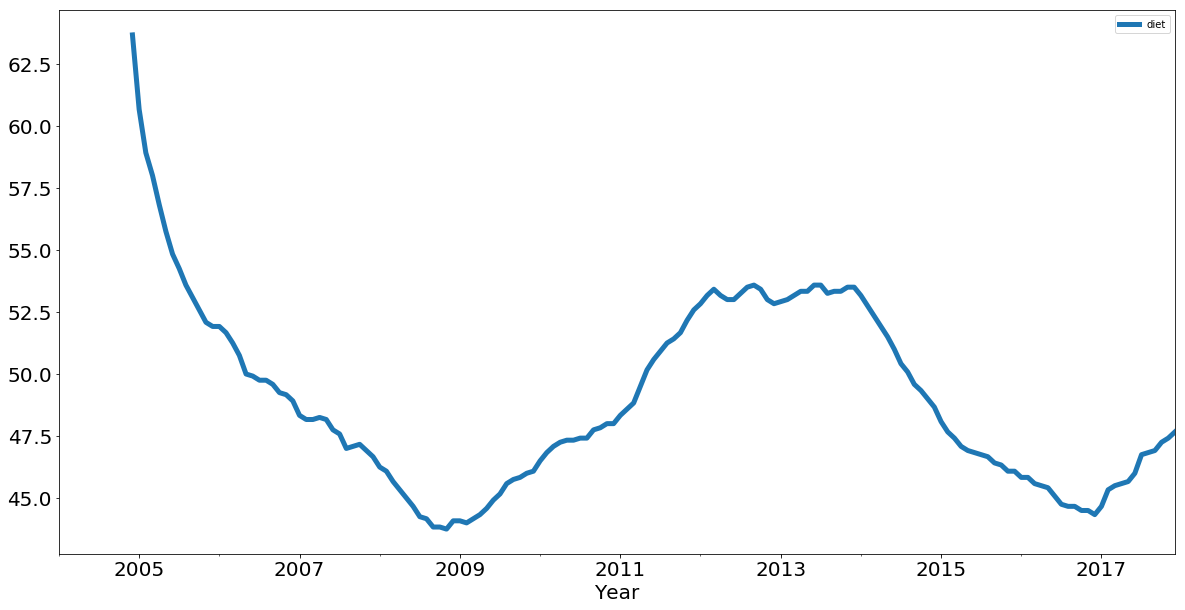

In [12]:
diet = df[['diet']]
diet.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

# Trends in Gym

Text(0.5, 0, 'Year')

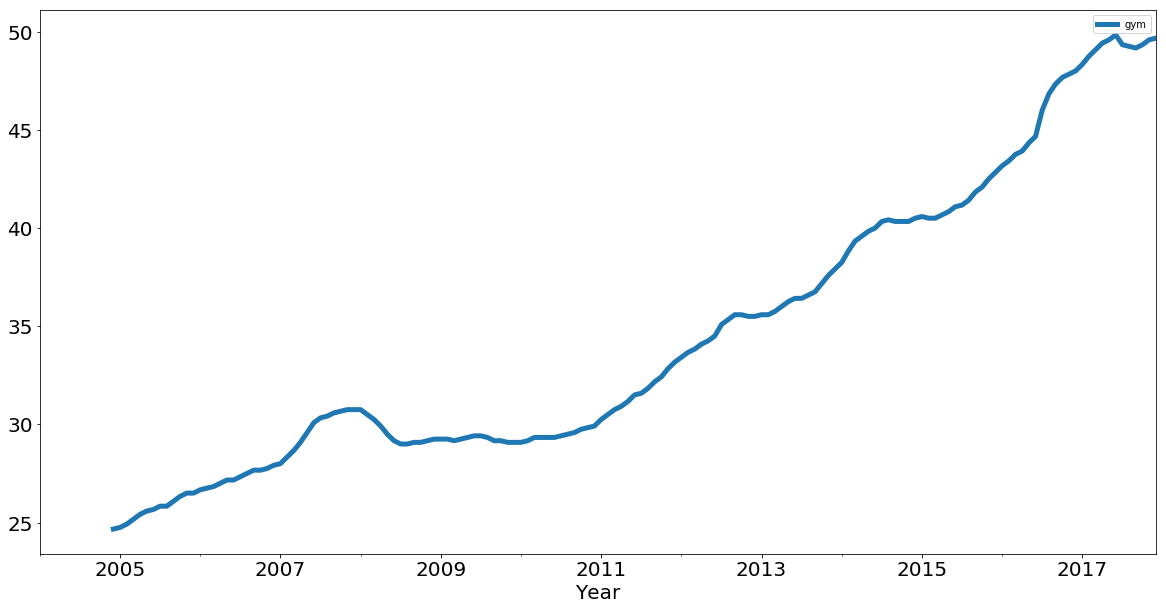

In [13]:
gym = df[['gym']]
gym.rolling(12).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

# Compare two search terms (Diet & Gym)

Text(0.5, 0, 'Year')

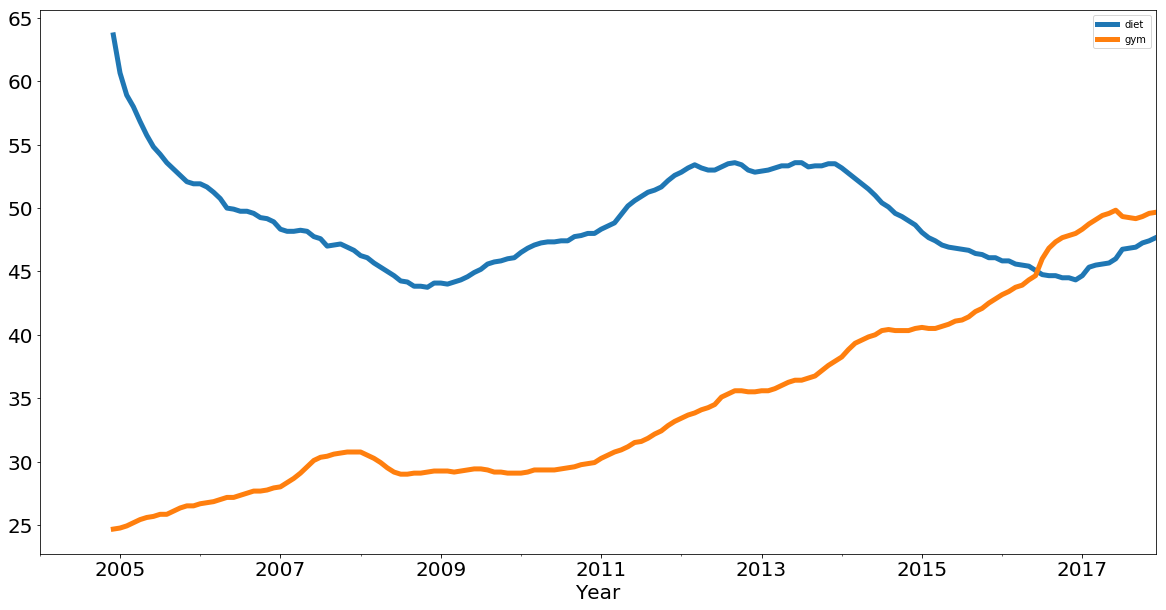

In [14]:
df_rm = pd.concat([diet.rolling(12).mean(), gym.rolling(12).mean()], axis=1)
df_rm.plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

# Seasonal Patterns in Time Series Data

Seasonal variation, or seasonality, are cycles that repeat regularly over time.

One way to think about the seasonal components to the time series of your data is to remove the trend is called "differencing", where you look at the difference between successive data points (called "first-order differencing", because you're only looking at the difference between one data point and the one before it).

# First-order differencing

# SEASON IN DIET

Text(0.5, 0, 'Year')

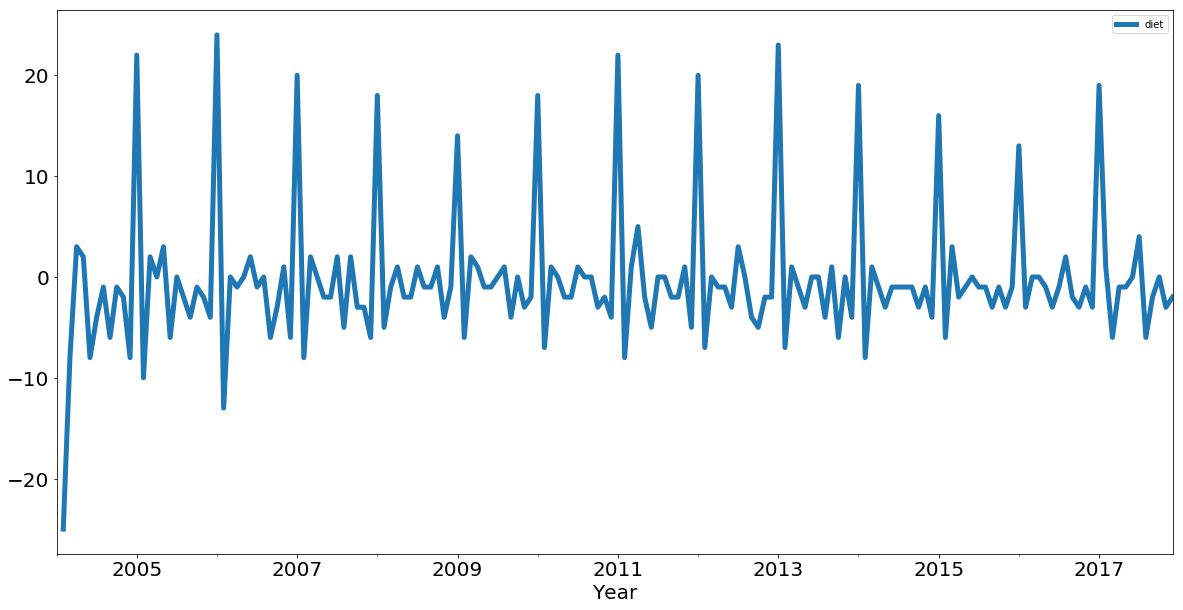

In [15]:
diet.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

# SEASON IN GYM

Text(0.5, 0, 'Year')

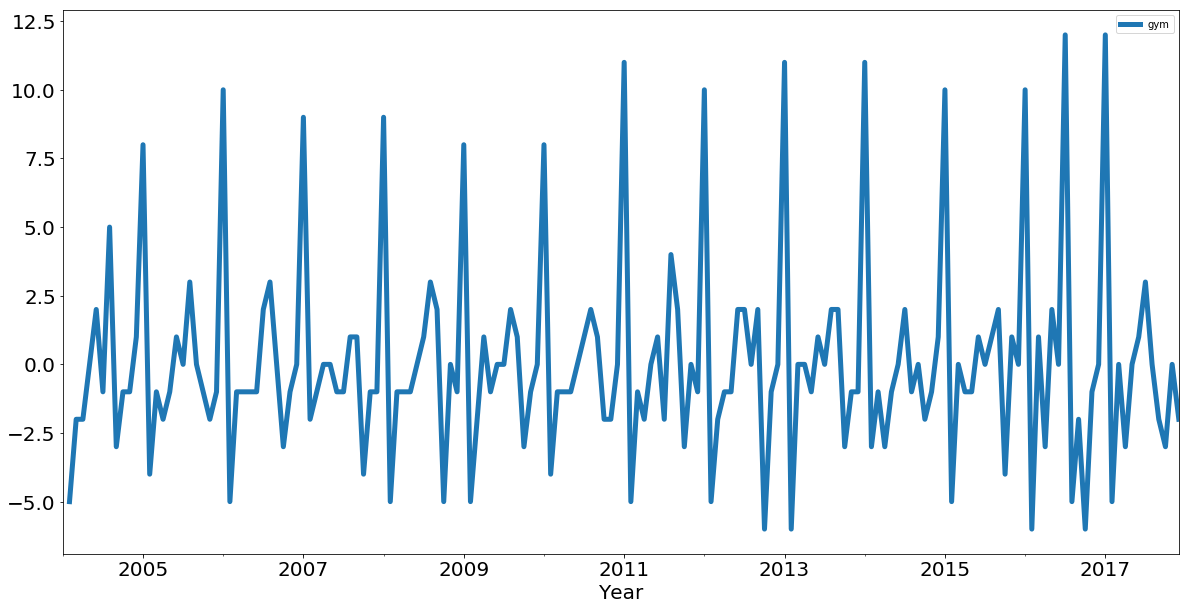

In [16]:
gym.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)

# SEASON IN FINANCE

In [17]:
finance = df[['finance']]

Text(0.5, 0, 'Year')

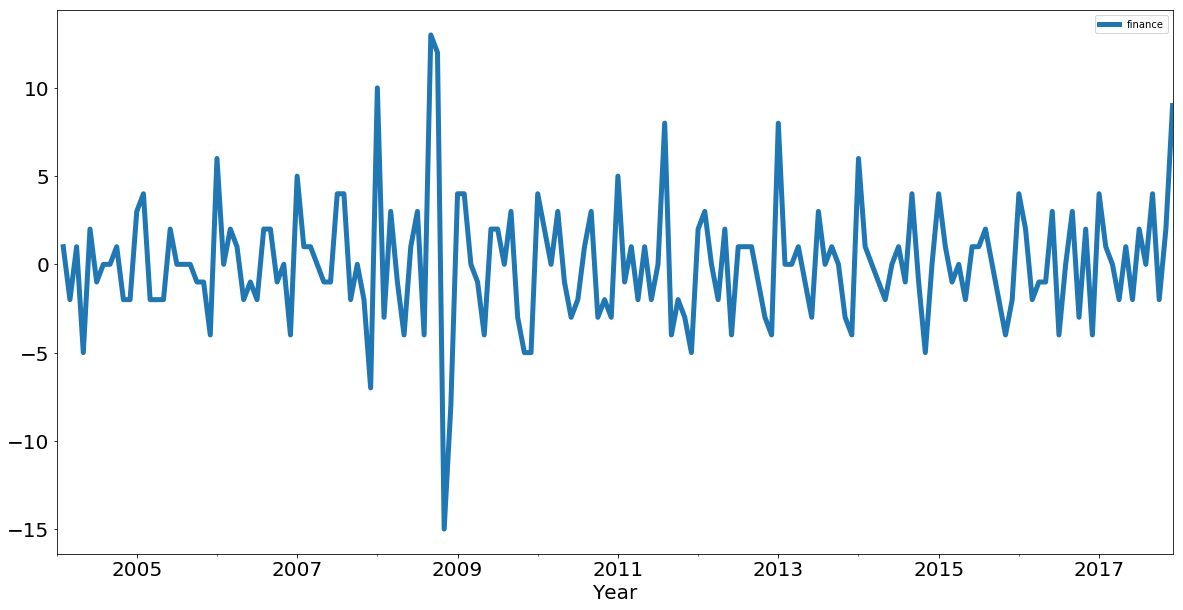

In [18]:
finance.diff().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.xlabel('Year', fontsize=20)